# Step 1: Reading and Understanding the Data

- Let us first import NumPy and Pandas and read the housing dataset

In [1]:
#imporing lib
#for removing Warning 
import warnings
warnings.filterwarnings('ignore')
#for importing and preprocessing we use pandas
import pandas as pd
import numpy as np
#for visualisation we use matplotlib and sns
import matplotlib.pyplot as plt
import seaborn as sns
#for build a model we use those lib
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#importing csv file 
data=pd.read_csv("day.csv")

In [3]:
#show the head
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of the data
data.shape

(730, 16)

#checking data info
data.info()

In [5]:
#describing for better statistical knowledge 
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#for the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking the data is having any missing value or not
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Now we have to clean the data and make the data as a format we want

### Now as per the dataset we can observe that the casual and register column summation is actually the cnt column so no need to include those column for further experiment so i need to drop those column

In [8]:
#Now we can observed that the instant and dteday column has not required for our further observation so we have to drop those column
#date month and year is mentioned already and instant is a serial no type column so we have no use of that column.

data_new =data.drop(['instant','dteday','registered','casual'] , axis=1)

data_new.head(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


# DATA VISUALISATION
### - Now here using matplotlib and seaborn we can visualise data and find out the colinearity in between

Visualising Numeric Variables



Let's make a pairplot of all the numeric variables

<Figure size 1440x1152 with 0 Axes>

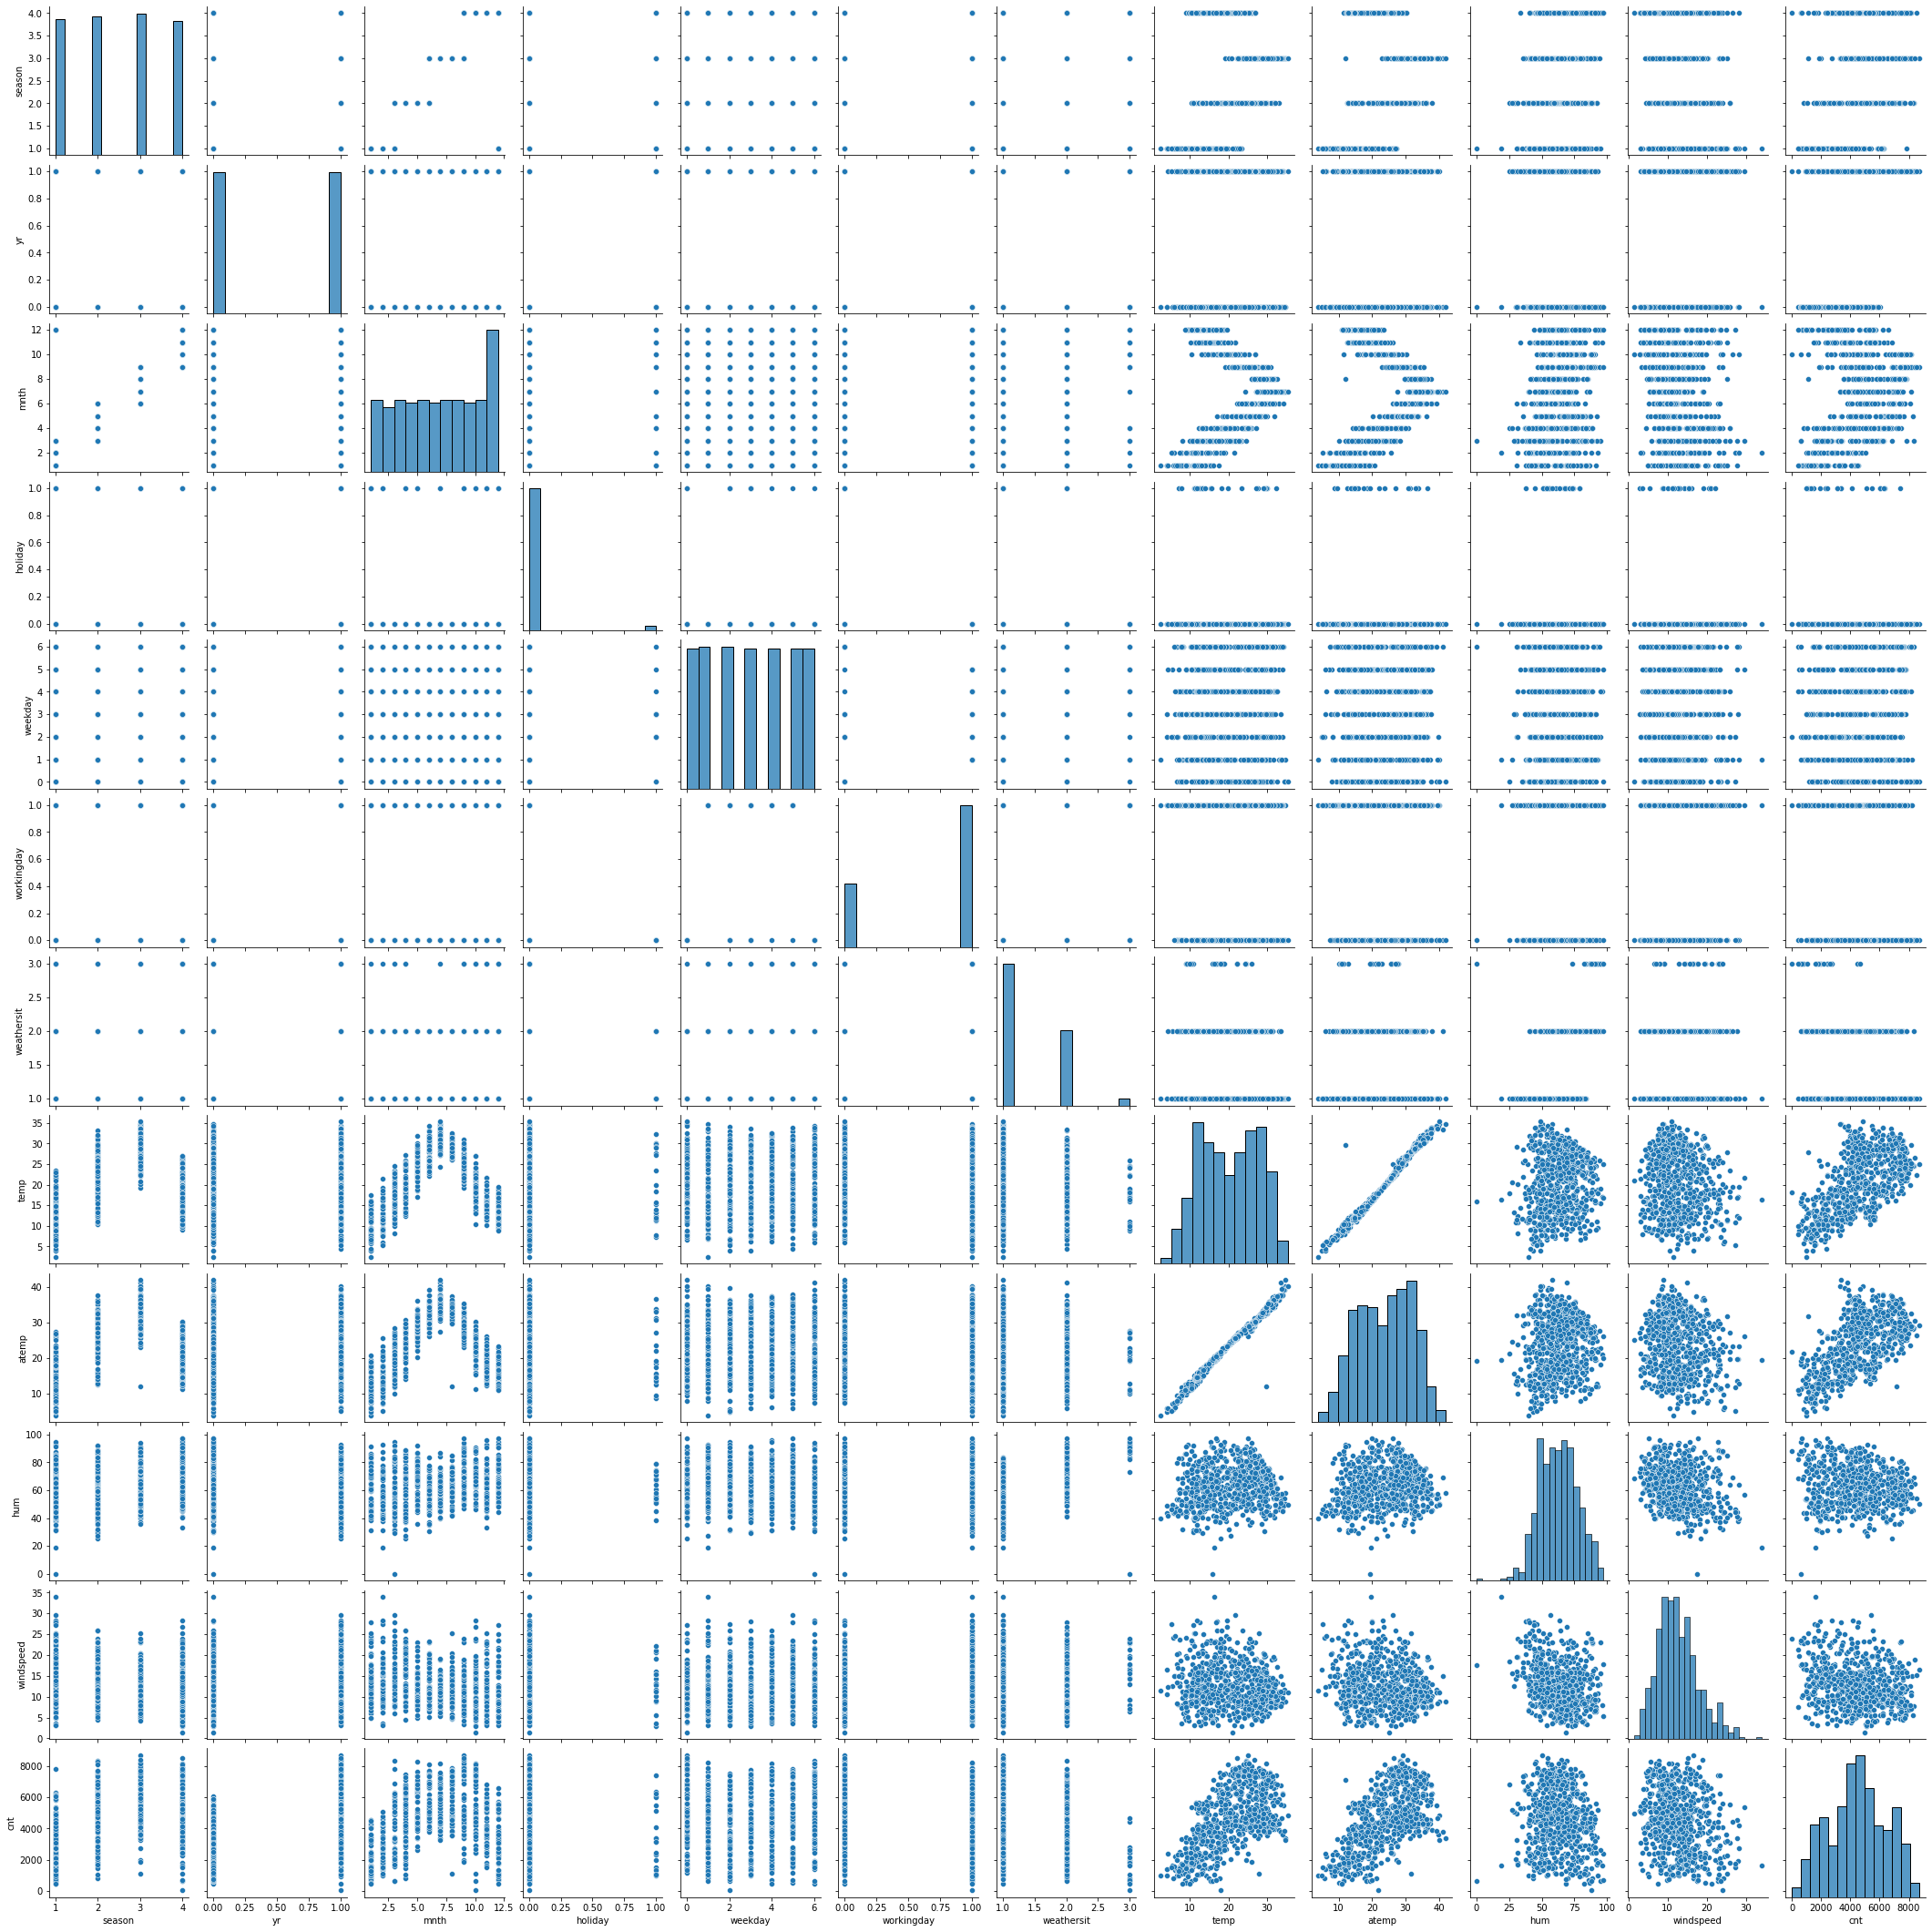

In [9]:
plt.figure(figsize=[20,16])
sns.pairplot(data_new)
plt.show()

# checking the corelation by heatmap

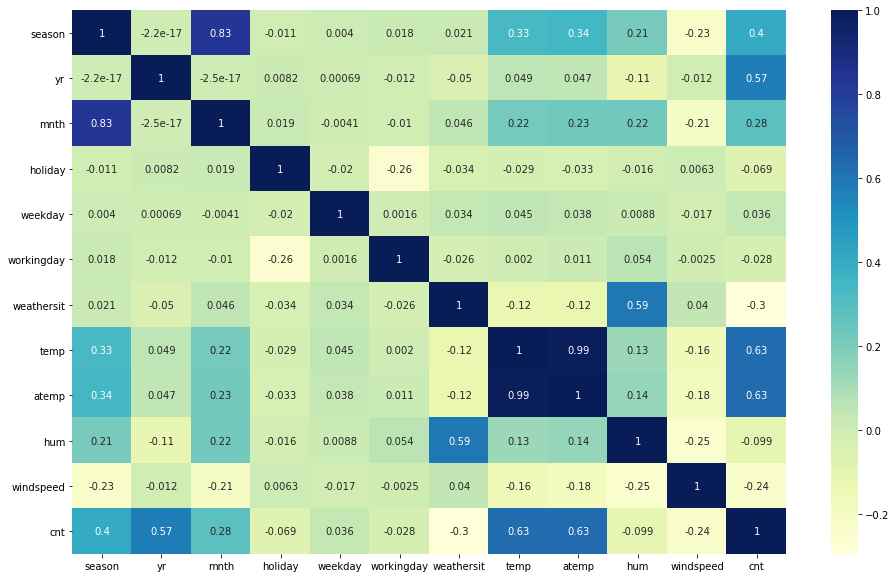

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(data_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Inference:

- yr
- temp
- atemp

#### These three are most corelated with count

### - Now we have to visualize about the non-numaric column by box plot
- 'holiday', 'yr','workingday' need to chang the column into yes no for box ploting and checking is there any outliers or not.

In [11]:
#Replacing all the data in string format
data_new.season.replace((1,2,3,4), ('spring','summer','fall','winter'), inplace=True)


In [12]:
#checking the data 
data_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
#column weathersit column is having more than four unque values so chnage the value
data_new.weathersit.replace((1,2,3,4), ('Clear','Mist','Light Rain','Heavy Rain'), inplace=True)
data_new.weathersit.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [14]:
#in weekdays and weekoffdays are the same 
data_new.weekday.replace((0,1,2,3,4,5,6), ('SunDay','MonDay','TueDay','WedDay','ThursDay','Fri Day','Sat Day'), inplace=True)
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,MonDay,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,TueDay,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,WedDay,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,ThursDay,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Fri Day,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#for chenging the month column into string value for better visualisation 
data_new.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG', 'SEPT','OCT','NOV','DEC'), inplace=True)
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,MonDay,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,TueDay,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,WedDay,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,ThursDay,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,Fri Day,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


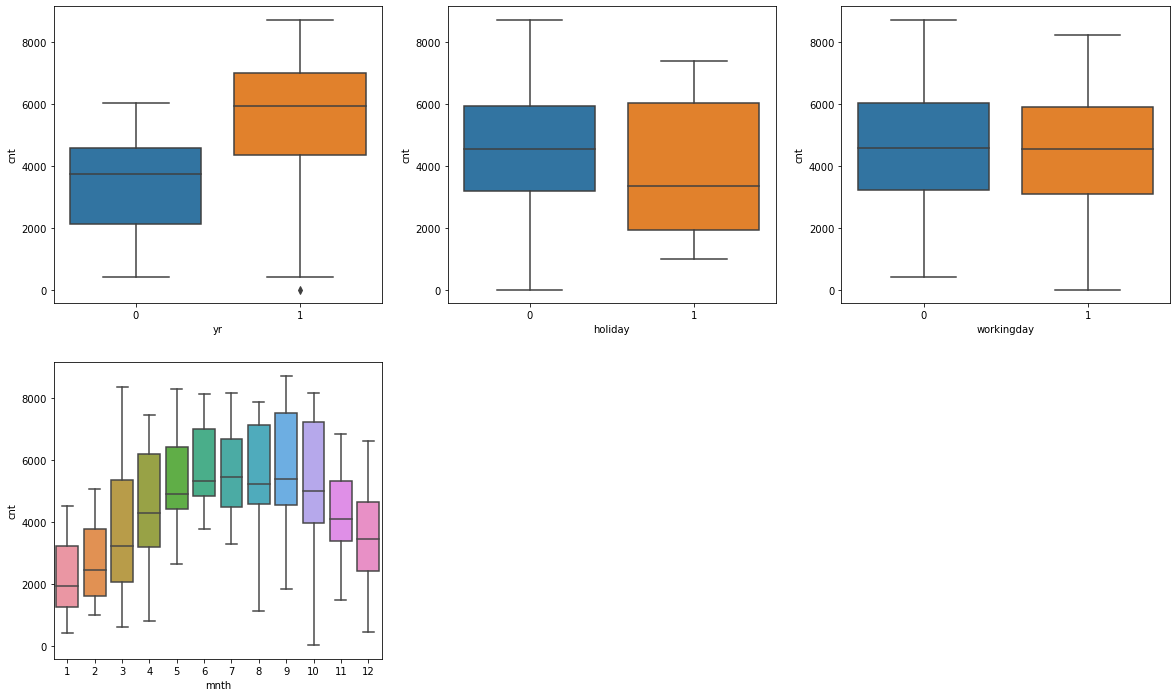

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = data)

plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)

plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)




plt.show()

# Inference :
### From visualising the dataset we can tell that :-
 -  pic 1 is for the difference between year 2018 and year 2019 we can easily say that the year of 2019 is better that 2018 where the median of 2018 is near about 4000 count in 2019 the median increased by 6000 


-   From pic 2 the difference between holiday and not a holiday so we can say that where holiday is not there the count is increased median is more than 4000 but if there is a holiday the median is lying in between 2000-4000
-   from pic 3 we didnt get any difference b/w working days and non working days

-   from pic 4 we can saY that the median and the highest count in sept month 

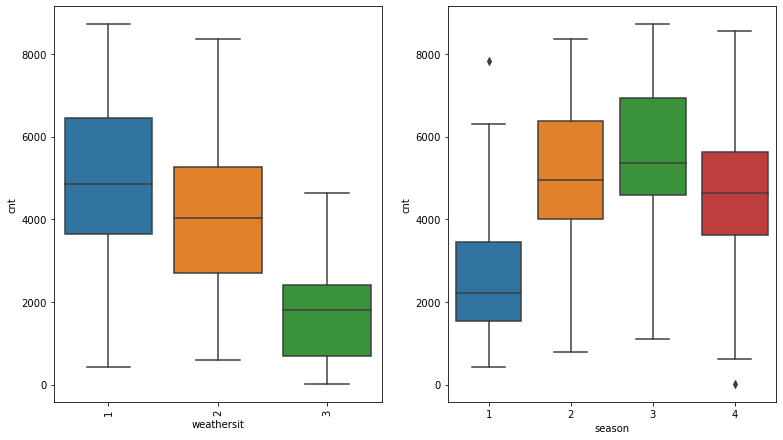

In [17]:
plt.figure(figsize=[20,16])

plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

### Inference:

-      From these two pic we can say that when the weather is 'Clear'  count is high where the median is 4000to 6000 and its very low count when weather is not good or rainy time the median is below 2000 .
-   Now when we look at the last pic in the fall time the count is rapidly increased the median is near about 5000 count ..

# Outliers:

### Here we convert the data and check the colinearity between target variable and independent variable 
- Now here we got a less number of data so we donot loss any data so need to remove outliers 
-  As of now we checked our box plot and there is some outliers so we donot remove as of now because we have already less data for training so as of now we can ignore the outliers but for the industry base and depends on the data size we have to decide to apply the outiers IQR calculation or not.


In [18]:
data_new.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,MonDay,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,TueDay,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,WedDay,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,ThursDay,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,Fri Day,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,JAN,0,Sat Day,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,JAN,0,SunDay,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,JAN,0,MonDay,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,JAN,0,TueDay,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,JAN,0,WedDay,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


#  Dummy Variables
-  We need to convert all the variables and do the dummy column for further experiment.
- First start with season column here we have 4 unque value

In [19]:
#imputing  Dummies in column season and remove the first element using drop_first
Bikes_season_dummy=pd.get_dummies(data_new['season'] ,drop_first = True)
Bikes_season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
Bikes_weathersit_dummy=pd.get_dummies(data_new['weathersit'] ,drop_first = True)
Bikes_weathersit_dummy.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0




### Same as we done for the season variable we need to do all the variables which need to seperated by dummies,  Further step we will continue to do with the non-numaric column

In [21]:
#same i done for month column also 
Bikes_month_dummy=pd.get_dummies(data_new['mnth'],drop_first = True)
Bikes_month_dummy.head()

,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEPT
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
#for weekdays also we did the same 
Bikes_weekdays_dummy=pd.get_dummies(data_new['weekday'],drop_first = True)
Bikes_weekdays_dummy.head()

,MonDay,Sat Day,SunDay,ThursDay,TueDay,WedDay
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [23]:
# Add the results to the original dataset

data_for_marge= pd.concat([data_new,Bikes_weekdays_dummy,Bikes_month_dummy,Bikes_season_dummy,Bikes_weathersit_dummy],axis = 1)

In [24]:
data_for_marge.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,MAR,MAY,NOV,OCT,SEPT,spring,summer,winter,Light Rain,Mist
0,spring,0,JAN,0,MonDay,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,1
1,spring,0,JAN,0,TueDay,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,JAN,0,WedDay,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,JAN,0,ThursDay,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,JAN,0,Fri Day,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [25]:
data_for_marge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  MonDay      730 non-null    uint8  
 13  Sat Day     730 non-null    uint8  
 14  SunDay      730 non-null    uint8  
 15  ThursDay    730 non-null    uint8  
 16  TueDay      730 non-null    uint8  
 17  WedDay      730 non-null    uint8  
 18  AUG         730 non-null    uint8  
 19  DEC         730 non-null    u

### Now here we can observe that we found the dummy variable and concatinate that variable in the dataset so from  where we made those dummy variable we need to drop those column so we drop and save that into a different dataset :
- season 
- month 
- weekdays
- weathersit

In [26]:

data_final_model =data_for_marge.drop(['weekday','mnth','season','weathersit'] , axis=1)

data_final_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   MonDay      730 non-null    uint8  
 9   Sat Day     730 non-null    uint8  
 10  SunDay      730 non-null    uint8  
 11  ThursDay    730 non-null    uint8  
 12  TueDay      730 non-null    uint8  
 13  WedDay      730 non-null    uint8  
 14  AUG         730 non-null    uint8  
 15  DEC         730 non-null    uint8  
 16  FEB         730 non-null    uint8  
 17  JAN         730 non-null    uint8  
 18  JUL         730 non-null    uint8  
 19  JUN         730 non-null    u

### Splitting the Data into Training and Testing Sets

- The first basic step for regression is performing a train-test split. spilt the dataset into two part 70-30(train,test)

In [27]:
Model_train, Model_test = train_test_split(data_final_model, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features

- Now Rescaling features comes into picture why we needs to use Rescaling because as per our dataset we use Rescaling in all the column except "1,0" and dummy column [temp,atemp,hum,windspeed]
- As per out dataset we need to normalize the data and rescale the column/variable
- standardization or normalization so that the units of the coefficients obtained are all on the same scale. 



1.    Min-Max scaling
2.    Standardisation (mean-0, sigma-1)

- we are now go ahead with min-max-scaling need to import lib 
-  now we take a variable And after that we have to fit that min-max to out dataset

In [28]:
# starting with min_max_scaler

scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
col_name = ['temp','atemp','hum','windspeed']

Model_train[col_name] = scaler.fit_transform(Model_train[col_name])
Model_train[col_name]

,temp,atemp,hum,windspeed
653,0.509887,0.501133,0.575354,0.300794
576,0.815169,0.766351,0.725633,0.264686
426,0.442393,0.438975,0.640189,0.255342
728,0.245101,0.200348,0.498067,0.663106
482,0.395666,0.391735,0.504508,0.188475
...,...,...,...,...
526,0.824514,0.762183,0.605840,0.355596
578,0.863973,0.824359,0.679690,0.187140
53,0.202618,0.218747,0.435939,0.111379
350,0.248216,0.223544,0.577930,0.431816


In [2]:
800=600*0.5+0.3*1500
y=600x1+1500x2

SyntaxError: cannot assign to literal (<ipython-input-2-f05a2c63ab24>, line 1)

#### Now see the dataset in compressed into 0-1 now these model is rescaled .

In [30]:
#checking the maximum value of all the column is 1 min is 0
Model_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,MonDay,Sat Day,...,MAR,MAY,NOV,OCT,SEPT,spring,summer,winter,Light Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,4486.382353,0.154902,0.129412,...,0.098039,0.084314,0.086275,0.086275,0.080392,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,1952.158739,0.362166,0.335985,...,0.297660,0.278131,0.281045,0.281045,0.272166,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Now want to check again the colinearity between all the column by heatmap

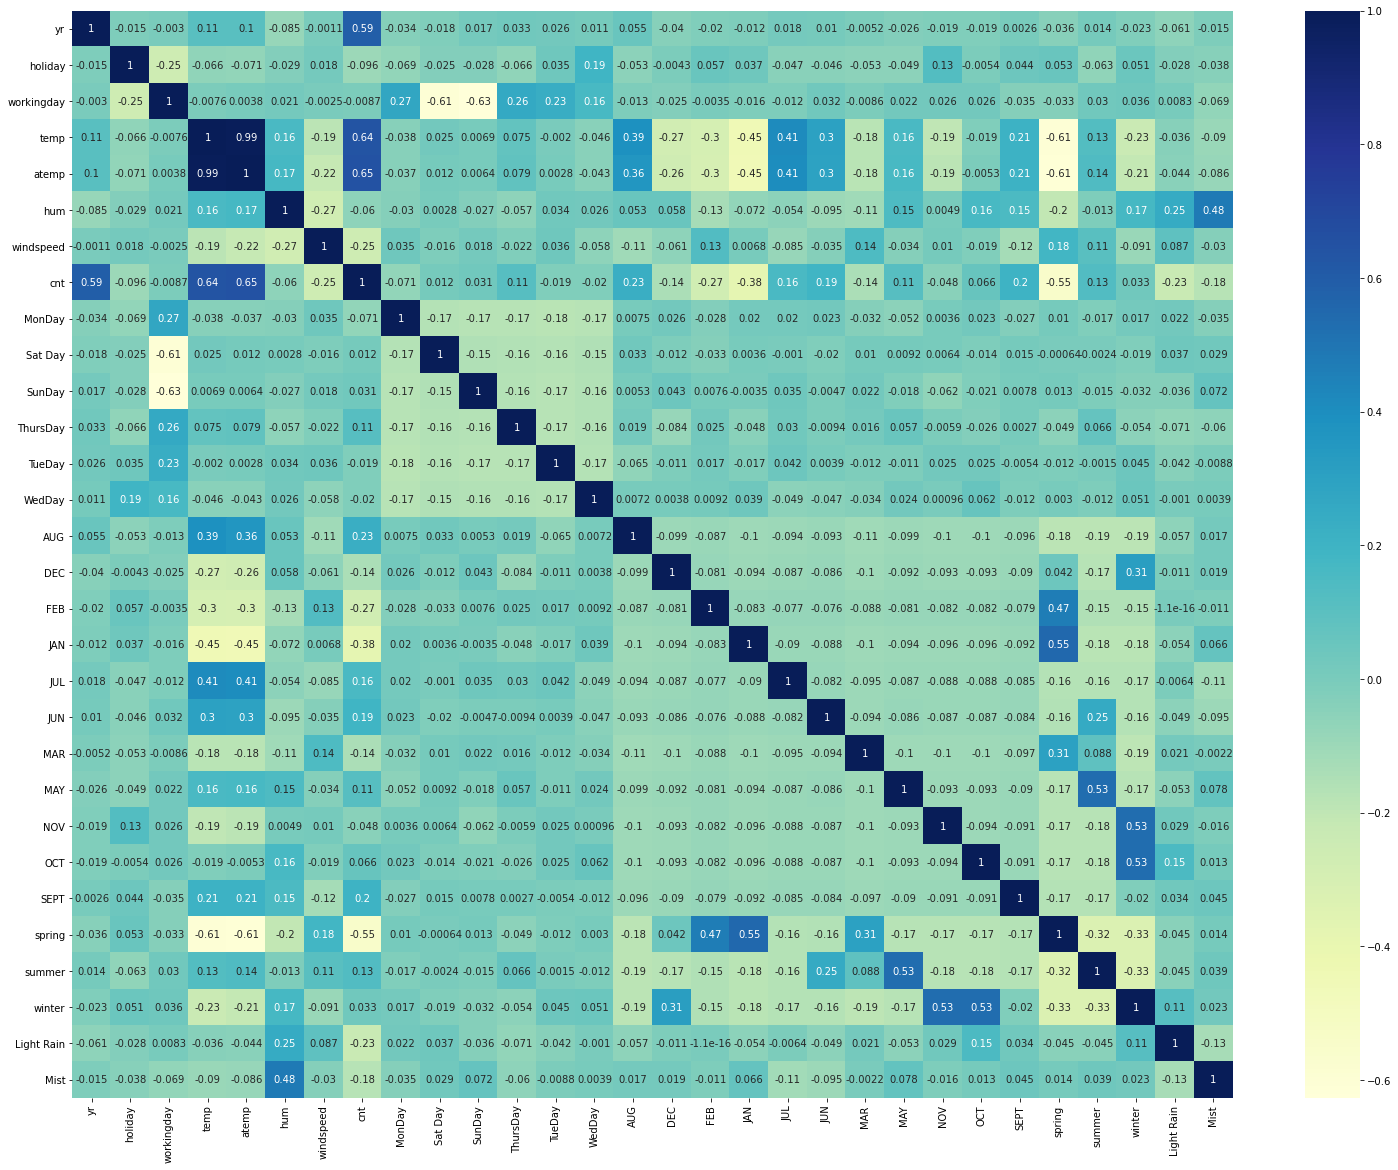

In [31]:
plt.figure(figsize = (26, 20))
sns.heatmap(Model_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Inference:
- Hum is most corelated with target variable 0.48 
- Lets check the pairplot of cnt and hum for the better visualisation

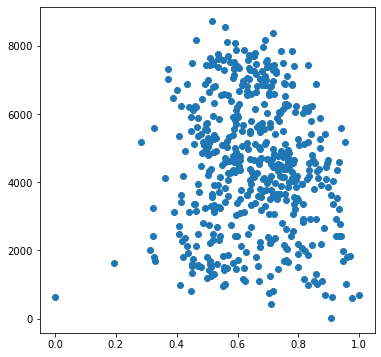

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(Model_train.hum,Model_train.cnt)
plt.show()

#### We can go with one by one adding feature or we can do RFE means adding all the features and then need to remove one by one 
So here we are following the 2nd step RFE because here column is more so we do RFE here

# Dividing into X and Y sets for the model building

In [33]:
y_train = Model_train.pop('cnt')
X_train = Model_train

 Now we fit a regression line using statmodels lib so we need to import that lib first so we need to do by statmodels and the first step is adding a constant value and perform it if we do not add a constant value then statmodels pass the line through origin 

# Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('MonDay', False, 9),
 ('Sat Day', False, 4),
 ('SunDay', False, 5),
 ('ThursDay', False, 13),
 ('TueDay', False, 8),
 ('WedDay', False, 11),
 ('AUG', False, 10),
 ('DEC', True, 1),
 ('FEB', False, 2),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 14),
 ('MAR', False, 15),
 ('MAY', False, 7),
 ('NOV', True, 1),
 ('OCT', False, 12),
 ('SEPT', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'DEC', 'JAN', 'JUL', 'NOV',
       'SEPT', 'spring', 'summer', 'winter', 'Light Rain', 'Mist'],
      dtype='object')

In [37]:
# Adding a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [38]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'MonDay', 'Sat Day', 'SunDay', 'ThursDay',
       'TueDay', 'WedDay', 'AUG', 'FEB', 'JUN', 'MAR', 'MAY', 'OCT'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   DEC         510 non-null    uint8  
 7   JAN         510 non-null    uint8  
 8   JUL         510 non-null    uint8  
 9   NOV         510 non-null    uint8  
 10  SEPT        510 non-null    uint8  
 11  spring      510 non-null    uint8  
 12  summer      510 non-null    uint8  
 13  winter      510 non-null    uint8  
 14  Light Rain  510 non-null    uint8  
 15  Mist        510 non-null    uint8  
dtypes: float64(4), int64(2), uint8(10)
memory usage: 32.9 KB


In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.34e-189
Time:                        12:34:23   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.5562    313.247      8.956      0.0

- Dec Jan Jul Nov is having more P value so need to drop those features
- when we drop features do it one bye one and build a model again

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
11,spring,5.27
3,temp,4.42
13,winter,3.83
12,summer,2.76
4,hum,1.93
9,NOV,1.76
7,JAN,1.68
15,Mist,1.57
6,DEC,1.49


In [45]:
# First i need to drop Dec col
X_train_DEC = X_train_rfe.drop(["DEC"], axis = 1)

In [46]:
X_train_lm = sm.add_constant(X_train_DEC)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          2.25e-189
Time:                        12:34:23   Log-Likelihood:                -4113.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2656.1102    306.385      8.669      0.0

In [47]:
vif = pd.DataFrame()
X = X_train_DEC
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.35
10,spring,5.20
3,temp,3.97
12,winter,3.77
11,summer,2.67
4,hum,1.91
6,JAN,1.57
14,Mist,1.56
7,JUL,1.49
8,NOV,1.48


- Here we can check the P value of NOV is high after removing the Dec col now we have to remove NOV col and build the model again

In [48]:
X_train_NOV = X_train_DEC.drop(["NOV"], axis = 1)

In [49]:
X_train_lm = sm.add_constant(X_train_NOV)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          4.45e-190
Time:                        12:34:23   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2592.3946    303.623      8.538      0.0

In [50]:
vif = pd.DataFrame()
X = X_train_NOV
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.77
9,spring,5.08
3,temp,3.89
11,winter,3.60
10,summer,2.64
4,hum,1.91
6,JAN,1.57
13,Mist,1.56
7,JUL,1.49
8,SEPT,1.30


##### Now JAN month is having more P-Values so i need to remove that feature

In [51]:
X_train_JAN= X_train_NOV.drop(["JAN"], axis = 1)

In [52]:
X_train_lm = sm.add_constant(X_train_JAN)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.69e-190
Time:                        12:34:23   Log-Likelihood:                -4116.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2491.6822    299.629      8.316      0.0

In [53]:
vif = pd.DataFrame()
X = X_train_JAN
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
8,spring,5.02
3,temp,3.61
10,winter,3.49
9,summer,2.61
4,hum,1.90
12,Mist,1.56
6,JUL,1.48
7,SEPT,1.30
11,Light Rain,1.24


In [54]:
X_train_Spring= X_train_JAN.drop(["spring"], axis = 1)

In [55]:
X_train_lm = sm.add_constant(X_train_Spring)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.89e-190
Time:                        12:34:23   Log-Likelihood:                -4120.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1984.0721    234.480      8.462      0.0

In [56]:
vif = pd.DataFrame()
X = X_train_Spring
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
11,Mist,1.55
6,JUL,1.43
8,summer,1.33
9,winter,1.29
10,Light Rain,1.24
7,SEPT,1.19
5,windspeed,1.18


In [57]:
X_train_Jul= X_train_Spring.drop(["JUL"], axis = 1)
X_train_lm = sm.add_constant(X_train_Jul)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          7.80e-190
Time:                        12:34:23   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1983.3145    235.900      8.407      0.0

In [58]:
vif = pd.DataFrame()
X = X_train_Jul
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.86
10,Mist,1.55
3,temp,1.27
8,winter,1.25
9,Light Rain,1.23
7,summer,1.19
5,windspeed,1.18
6,SEPT,1.11
1,yr,1.03


- After removing the highest p value gretter than 0.005 we have to calculate the VIF value and for calculating the VIF we need to import the lib  variance_inflation_factor 

- Step is taking the features into vif feature and calculating the VIF

In [59]:
X_train_Jul.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEPT', 'summer',
       'winter', 'Light Rain', 'Mist'],
      dtype='object')

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_cnt = lm.predict(X_train_Jul)

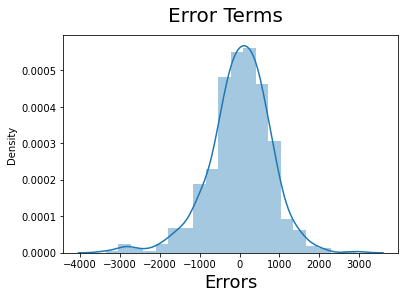

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

# Making Predictions
Applying the scaling on the test sets

In [62]:
Model_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,MonDay,Sat Day,...,MAR,MAY,NOV,OCT,SEPT,spring,summer,winter,Light Rain,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,1,...,0,0,0,1,0,0,0,1,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,10.899153,13.22605,68.7917,11.791732,2947,0,0,...,0,0,0,0,0,1,0,0,0,1
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,0,0,...,0,1,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,1,0,0,0,1,0,1


In [63]:
col_name_p = ['temp','atemp','hum','windspeed']

Model_test[col_name_p] = scaler.transform(Model_test[col_name_p])
Model_test[col_name_p]

,temp,atemp,hum,windspeed
184,0.831783,0.769660,0.657364,0.084219
535,0.901354,0.842587,0.610133,0.153728
299,0.511964,0.496145,0.837699,0.334206
221,0.881625,0.795343,0.437098,0.339570
152,0.817246,0.741471,0.314298,0.537414
...,...,...,...,...
400,0.257562,0.243430,0.708888,0.287411
702,0.519232,0.511907,0.756118,0.283397
127,0.584649,0.577380,0.650923,0.069510
640,0.745598,0.682653,0.817947,0.052115


In [64]:
Model_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,MonDay,Sat Day,...,MAR,MAY,NOV,OCT,SEPT,spring,summer,winter,Light Rain,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,2659,0,1,...,0,0,0,1,0,0,0,1,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,0,0,1,0,0,0


# Dividing into X_test and y_test¶

In [65]:
y_test = Model_test.pop('cnt')
X_test = Model_test

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   MonDay      219 non-null    uint8  
 8   Sat Day     219 non-null    uint8  
 9   SunDay      219 non-null    uint8  
 10  ThursDay    219 non-null    uint8  
 11  TueDay      219 non-null    uint8  
 12  WedDay      219 non-null    uint8  
 13  AUG         219 non-null    uint8  
 14  DEC         219 non-null    uint8  
 15  FEB         219 non-null    uint8  
 16  JAN         219 non-null    uint8  
 17  JUL         219 non-null    uint8  
 18  JUN         219 non-null    uint8  
 19  MAR         219 non-null    

In [67]:
X_train_Jul.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEPT', 'summer',
       'winter', 'Light Rain', 'Mist'],
      dtype='object')

In [68]:
X_test=X_test.drop([ 'workingday',
       'MonDay', 'Sat Day', 'SunDay', 'ThursDay', 'TueDay', 'WedDay', 'AUG','atemp',
       'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT',
       'spring'],axis=1)

In [69]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEPT', 'summer', 'winter',
       'Light Rain', 'Mist'],
      dtype='object')

In [70]:
# Now let's use our model to make predictions.
# Adding a constant variable 
X_test_new = sm.add_constant(X_test)


In [71]:

X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'SEPT', 'summer',
       'winter', 'Light Rain', 'Mist'],
      dtype='object')

In [72]:
lm.params.index.tolist()

['const',
 'yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'SEPT',
 'summer',
 'winter',
 'Light Rain',
 'Mist']

In [73]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [74]:
y_pred

184    3675.974778
535    8049.543051
299    3481.492286
221    5143.881342
152    5467.355852
          ...     
400    3261.563426
702    6163.601294
127    4564.046005
640    7117.632416
72     2523.228692
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

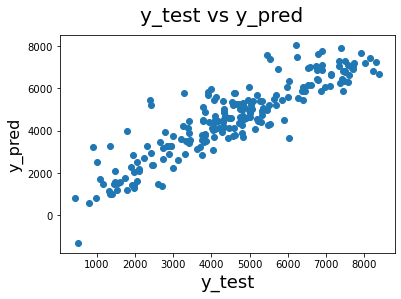

In [75]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [76]:
from sklearn.metrics import r2_score
RSquare = r2_score(y_true=y_test, y_pred=y_pred)
RSquare*100


80.4641049637139

In [77]:
#Calcuate adj R2 on test data
n=X_test.shape[0]
# calculate number of predictors p
p=X_test.shape[1]

AdjustedRSquare = round(1-(1-RSquare)*(n-1)/(n-p-1),4)
AdjustedRSquare*100

79.52